# <center>Metody Numeryczne</center>

# Laboratorium 7: Pierwiastki wielomianu i wartości własne


**Wykonał:** Adrian Knapik

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych. W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$. Należy wyznaczyć takie jej argumenty $x^*$, dla których zachodzi równość $f(x^*) = 0$. 

Argumenty spełniające powyższe równanie nazywane są *pierwiastkami równania*.

<br>

**Wielomian**

Dany jest wielomian $w(x)$ w postaci kanonicznej (ogólnej):

$$
w(x) = a_nx^n + a_{n-1}x^{n-1} + \ldots + a_2x^2 + a_1x + a_0
$$

jego wektor współczynników wyraża się wzorem:

$$
\mathbf{a} = (a_0, a_1, ..., a_{n-1}, a_n)
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`,
    - `nppoly` - `numpy.polynomial.polynomial`.

---

In [6]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as nppoly

---

### **Zadanie 1.**

Dane są wielomiany w postaci iloczynowej:
$$
\begin{align*}
w_1(x) &= (x-1)(x-2)(x-3)\\
w_2(x) &= (x-1)(x-2) \cdot \ldots \cdot (x-20)
\end{align*}
$$

**Punkt 1.**

1. Oblicz wektor współczynników $\mathbf{a}_1$ wielomianu $w_1(x)$ w postaci kanonicznej dla zadanego wektora pierwiastków.

2. Sprawdź poprawność wyznaczonego wektora z definicją w sekcji **Cel zajęć**.

> **Wskazówka:** Użyj funkcji [`nppoly.polyfromroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfromroots.html).

<br>

**Punkt 2.**

Zaimplementuj funkcję *`roots_20()`* wyznaczającą miejsca zerowe wielomianu na podstawie jego wektora współczynników. Funkcja powinna najpierw lekko zaburzać wejściowe współczynniki za pomocą dodania do nich losowej wartości postaci: $N(0,1) \cdot 1\mathrm{e}{-10}$.

> **Wskazówka:** Użyj funkcji [`np.random.random_sample()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html) oraz [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

1. Wyznacz wektor współczynników $\mathbf{a}_2$ wielomianu $w_2(x)$.

2. W pętli 20 iteracji:
    
    1. Wyznacz pierwiastki zaburzonego wielomianu używając *`roots_20()`*.

    2. Ustaw zaburzony wektor współczynników jako nowy wektor współczynników.

    3. Wyrysuj na jednym wykresie wyznaczone części rzeczywiste pierwiastków, a na drugim części urojone (w każdej iteracji dorysowuj pierwiastki na tym samym rysunku).

4. Określ, które pierwiastki są najbardziej wrażliwe na zaburzenia oraz opisz wnioski wynikające z utworzonego wykresu.

5. Zaproponuj sposób oszacowania uwarunkowania każdego z pierwiastków.


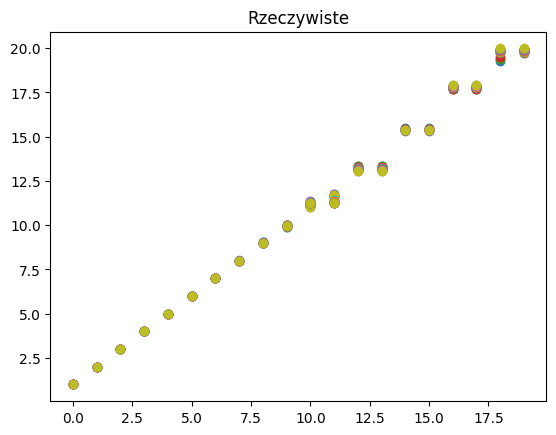

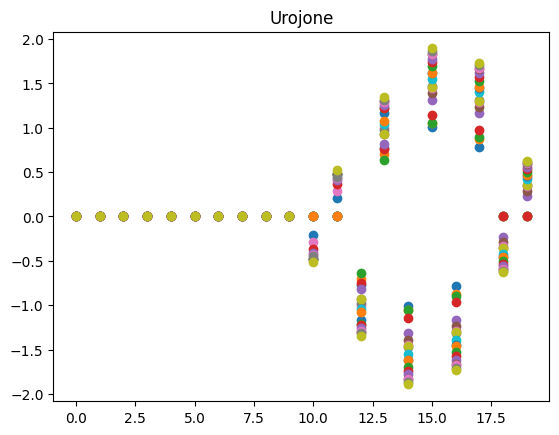

In [81]:
# ===== Twoja implementacja tutaj =====
a1 = nppoly.polyfromroots((1,2,3))
a2 = nppoly.polyfromroots(np.linspace(1,20,20))

fig1,ax1 = plt.subplots()
plt.title("Rzeczywiste")
fig2,ax2 = plt.subplots()
plt.title("Urojone")
for i in range(1,20):
    a2,pier = main.roots_20(a2)
    ax1.plot(pier.real, 'o')
    ax2.plot(pier.imag, 'o')

Komentarz:

3. Najmniej podatne na zaburzenia są pierwiastki mniejsze od 1 do 10. Z kolei najbardziej podatne są pierwiastki 12 i 19.
Na wykresach możemy zauważyć, że zaburzenia nie rosną liniowo wraz ze stopniem pierwiastka oraz że są znacznie większe dla części urojonej, która pojawia się od 10. pierwiastka.

4. Uwarunkowanie możemy policzyć ze wzoru:
|r| / |p'(r)| * ||a|| / |aₙ|
r – pierwiastek,
p'(r) – pochodna wielomianu obliczona w pierwiastku,
||a|| – norma wektora współczynników,
aₙ – współczynnik przy najwyższej potędze.

---

### **Zadanie 2.**

Na podstawie wiedzy z wykładu wiadomo, że wartości własne macierzy kwadratowej są pierwiastkami wielomianu charakterystycznego tej macierzy oraz, że każdy wielomian posiada swoją macierz stowarzyszoną (macierz Frobeniusa). Wynika z tego, że **poszukiwanie pierwiastków wielomianu jest równoważne poszukiwaniu wartości własnych macierzy stowarzyszonej**.

<br>

Dany jest wielomian:
$$
w_3(x) = (x-1)^8
$$ 

Należy wyznaczyć numerycznie jego miejsca zerowe na różne sposoby i porównać otrzymane wyniki z wartościami analitycznymi.

**Punkt 1.**

Przygotowanie macierzy stowarzyszonej.

1. Zaiplementuj funkcję *`frob_a()`* tworzącą [macierz Frobeniusa](https://en.wikipedia.org/wiki/Companion_matrix) dla zadanego wektora współczynników wielomianu.

2. Wyznacz macierz Frobeniusa $\mathbf{F_{w_3}}$ dla wielomianu $w_3(x)$.

<br>

**Punkt 2.**

Wyznaczenie pierwiastków wielomianu.

1. Wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$ za pomocą funkcji [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html).  

2. Dokonaj rozkładu Schura macierzy $\mathbf{F_{w_3}}$ i na tej podstawie wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$. Użyj funkcji [`sp.linalg.schur()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.schur.html).

3. Wyznacz pierwiastki wielomianu $w_3(x)$ przy użyciu funkcji [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

Zestawienie wyników.

1. Utwórz wykres typu *scatter plot* i wyrysuj na nim wartości pierwiastków wyznaczonych w **Punkcie 2.** oraz pierwiastki oblicznone analitycznie na płaszczyźnie zespolonej.

2. Opisz wnioski wynikające z wykresu.

Text(0, 0.5, 'Urojone')

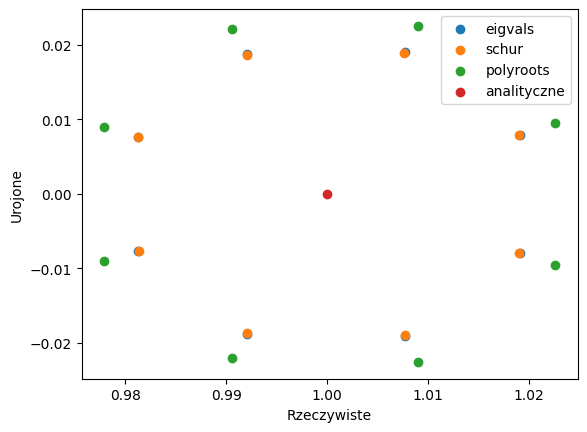

In [84]:
# ===== Twoja implementacja tutaj =====
a3 = nppoly.polyfromroots((1,1,1,1,1,1,1,1))
Fw3 = main.frob_a(a3)

met1 = np.linalg.eigvals(Fw3)
met2, P = sp.linalg.schur(Fw3, output='complex')
met2 = np.diag(met2)
met3 = nppoly.polyroots(a3)
plt.scatter(met1.real, met1.imag)
plt.scatter(met2.real, met2.imag)
plt.scatter(met3.real, met3.imag)
plt.scatter(1, 0) #analitycznie
plt.legend(("eigvals","schur", "polyroots", "analityczne"))
plt.xlabel("Rzeczywiste")
plt.ylabel("Urojone")

Wnioski z wykresu:

Analizując wykres, możemy zauważyć, że błędy występują dla każdej metody obliczania pierwiastków.
Największy błąd występuje dla metody polyroots, z kolei dla schur i eigvals wyniki są mniej błędne i bardzo podobne do siebie. Pomimo niewielkiej różnicy można zauważyć, że najmniejszy błąd występuje dla metody schur.

---

### **Zadanie 3.**

Dany jest wielomian:
$$
w_4(x) = 243x^7 - 486x^6 + 783x^5 - 990x^4 + 558x^3 - 28x^2 - 72x + 16
$$ 

1. Wyznacz numerycznie miejsca zerowe wielomianu $w_4(x)$ w sposób analogiczny jak w **Zadaniu 2.**

2. Wyrysuj na płaszczyźnie zespolonej wyznaczone pierwiastki oraz pierwiastki wyliczone analitycznie.

3. Porównaj otrzymane wyniki z rezulatatami otrzymanymi w **Zadaniu 2.**

>**Wskazówka:** Sprawdź poprawność wyznaczonego wektora współczynników z definicją w sekcji **Cel zajęć**.

[0, 0, 0, 1.4142135623730951, -1.4142135623730951]


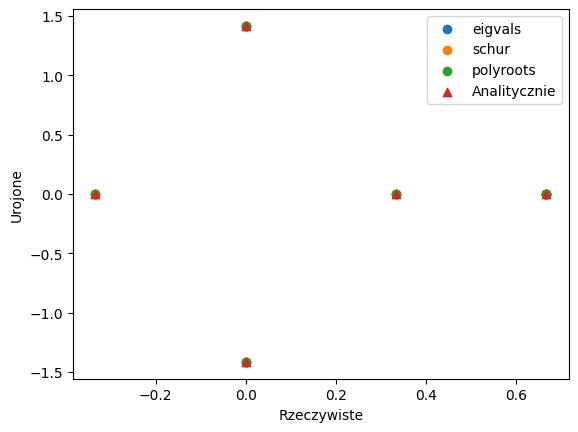

In [99]:
# ===== Twoja implementacja tutaj =====
import math
a4 = np.array([16,-72,-28, 558,-990, 783,-486, 243])
Fw4 = main.frob_a(a4)
met1 = np.linalg.eigvals(Fw4)
met2, P = sp.linalg.schur(Fw4, output='complex')
met2 = np.diag(met2)
met3 = nppoly.polyroots(a4)
plt.scatter(met1.real, met1.imag)
plt.scatter(met2.real, met2.imag)
plt.scatter(met3.real, met3.imag)

r = [2/3,1/3,-1/3,0,0]
i = [0, 0, 0, math.sqrt(2), -math.sqrt(2)]
print(i)
plt.scatter(r,i,marker='^')
plt.xlabel("Rzeczywiste")
plt.ylabel("Urojone")
plt.legend(("eigvals","schur", "polyroots","Analitycznie"))

Komentarz:

Porównując wyniki z tymi z zadania 2, możemy zauważyć, że tutaj występują o wiele mniejsze błędy (lub nie występują wcale), a punkty na wykresie dla każdej metody pokrywają się idealnie. Prawdopodobnie powodem jest to, że w zadaniu drugim mamy 8 pierwiastków równych 1, a wielomiany o wielokrotnych pierwiastkach są bardzo źle uwarunkowane. Z kolei wielomian w zadaniu 3 jest dobrze uwarunkowany.

---

### **Zadanie 4.**

Zadanie polega na przeanalizowaniu w jaki sposób różne przekształcenia macierzy wpływają na pojawianie się błędów numerycznych.

W celu przeprowadzenia analizy skonstruuj trzy macierze diagonalne $\mathbf{A}_n$ dla $n = \{10,20,30\}$. Współczynniki macierzy powinny być zdefiniowane jako $a_{ii} = 2^i$ dla $i = \{1,2,...,n\}$ (skorzystaj z funkcji [`np.diag()`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)).

**Punkt 1.**

1. Dla każdej z macierzy $\mathbf{A}_n$ oblicz wartości własne przy użyciu [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html) i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 2.**

1. Zdefiniuj funcję *`is_nonsingular()`* sprawdzającą czy zadana macierz nie jest singularna. 

2. Skonstruuj losowe niesingularne macierze wektorów własnych $\mathbf{P}_n$, których wartości współczynników są liczbami całkowitymi z zakresu $(0,100)$. Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{P}_n$ oblicz macierze $\mathbf{B}_n$ postaci: 
$$
\mathbf{B}_n = \mathbf{P}_n\mathbf{A}_n\mathbf{P}_{n}^{-1}
$$ 

3. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{B}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

>**Wskazówka:** Niesingularność macierzy $\mathbf{P}_n$ można zapewnić generując je w pętli, w której warunkiem stopu będzie wynik funkcji zaimplementowanej w **Podpunkcie 1.**

<br>

**Punkt 3.**

1. Bazując na macierzach $\mathbf{P}_n$ wygeneruj macierze ortogonalne $\mathbf{Q}_n$ (można do tego użyć rozkładu QR). Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{Q}_n$ oblicz macierze $\mathbf{C}_n$ postaci:
$$
\mathbf{C}_n = \mathbf{Q}_n\mathbf{A}_n\mathbf{Q}_{n}^{-1}
$$

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{C}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 4.**

1. Bazując na analitycznych wartościach własnych dla wielomianów charakterystycznych macierzy $\mathbf{A}_n$ wygeneruj macierze Frobeniusa $\mathbf{F}_n$ korzystając z funkcji zaimplementowanej w **Zadaniu 2.** 

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{F}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 5.**

Porównaj wyniki otrzymane we wszystkich punktach. Opisz z czego wynikają powstałe błędy obliczeń.

In [ ]:
# ===== Twoja implementacja tutaj =====
A = {}

Errors = {
    "A" : [],
    "B" : [],
    "C" : [],
    "F" : []
}

#[2**i for i in np.array(range(1,10 + 1))] inna wersja

for n in [10,20,30]:
    diag = 2**np.array(range(1,n + 1))
    A[n] = np.diag(diag)
   


for n in A:
    anal = np.diag(A[n])

    errory = abs(np.round(anal - np.sort(np.linalg.eigvals(A[n])), 10)) #przybliżam do 10 i uznaje że wszystkie errory mniejsze niż to wynikają z odejmownia na floatach, nie z przekształceń macierzy
    Errors["A"].append([max(errory), np.mean(errory)])

    while True:
        P = np.random.randint(0,100,(n,n)) 
        if main.is_nonsingular(P):
            break

    Pinv = np.linalg.inv(P)
    B = P @ A[n] @ Pinv
    
    errory = abs(np.round(anal - np.sort(np.linalg.eigvals(B)), 10))    
    Errors["B"].append([max(errory), np.mean(errory)])


    Q,R = np.linalg.qr(P,mode='reduced')
    Qinv = np.linalg.inv(Q)
    C = Q @ A[n] @ Qinv

    errory = abs(np.round(anal - np.sort(np.linalg.eigvals(C)), 10))    
    Errors["C"].append([max(errory), np.mean(errory)])

    
    F = main.frob_a(nppoly.polyfromroots(anal))

    errory = abs(np.round(anal - np.sort(np.linalg.eigvals(F)), 10))    
    Errors["F"].append([max(errory), np.mean(errory)])




for i, n in enumerate(A):
    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")
    print(f"   {'A_' + str(n) + ' (diag)':<18} {Errors["A"][i][0]:<18.2e} {Errors["A"][i][1]:<18.2e}")
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {Errors["B"][i][0]:<18.2e} {Errors["B"][i][1]:<18.2e}")
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {Errors["C"][i][0]:<18.2e} {Errors["C"][i][1]:<18.2e}")
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {Errors["F"][i][0]:<18.2e} {Errors["F"][i][1]:<18.2e}\n")


   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_10 (diag)        0.00e+00           0.00e+00          
   B_10 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_10 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_10 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_20 (diag)        0.00e+00           0.00e+00          
   B_20 (P*A*P^-1)    2.80e-09           7.35e-10          
   C_20 (Q*A*Q^T)     5.00e-10           7.50e-11          
   F_20 (Frobenius)   2.20e-09           5.55e-10          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_30 (diag)        0.00e+00           0.00e+00          
   B_30 (P*A*P^-1)    2.64e-05           1.17e-05          
   C_30 (Q*A*Q^T)     2.38e-06           

**Przykładowa forma zestawienia wyników:**
```python
for i, n in enumerate(n_values):
    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")
    print(f"   {'A_' + str(n) + ' (diag)':<18} {max_error_A[i]:<18.2e} {mean_error_A[i]:<18.2e}")
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {max_error_B[i]:<18.2e} {mean_error_B[i]:<18.2e}")
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {max_error_C[i]:<18.2e} {mean_error_C[i]:<18.2e}")
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {max_error_F[i]:<18.2e} {mean_error_F[i]:<18.2e}\n")
```

**Rezultat:**
```md
   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_10 (diag)        0.00e+00           0.00e+00          
   B_10 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_10 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_10 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_20 (diag)        0.00e+00           0.00e+00          
   B_20 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_20 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_20 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_30 (diag)        0.00e+00           0.00e+00          
   B_30 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_30 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_30 (Frobenius)   0.00e+00           0.00e+00
```

Komentarz:

Błąd był zerowy dla macierzy A, najmniejszy dla macierzy C, trochę większy dla B i największy dla F.

A – brak błędu wynika z tego, że nie wykonujemy żadnych operacji tracących precyzję.

B – błąd wynika z tego, że macierz P jest losowa, więc źle uwarunkowana.

C – błąd wynika z rozkładu QR, używającego zaokrągleń. Aczkolwiek jest to metoda numerycznie stabilna, więc błędy rosną powoli i są dosyć małe.

F – błąd wynika ze źle uwarunkowanego wielomianu, oprócz tego współczynniki wielomianu osiągają bardzo duże rozmiary, co powoduje utratę precyzji (liczby przechowujemy jako float).

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)